In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Problem 2: A visual history of Nobel prize winners

In [102]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/nobel.csv'
nobel = pd.read_csv(url)

Display the first 10 rows.

In [103]:
nobel.head(10)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland


## Part 1: who gets the Nobel Prize?

Count the number of rows (prizes) 

In [104]:
len(nobel)

969

Count the number of prizes, grouped by `sex`.

In [105]:
nobel.Sex.value_counts()

Male      893
Female     50
Name: Sex, dtype: int64

Count the number of prizes, grouped by `Birth Country`. Arrange the result by no. prizes in descending order and display the first 20 rows.

In [106]:
nobel['Birth Country'].value_counts(ascending=False).head(20)

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Canada                       18
Italy                        18
Switzerland                  17
Austria                      15
Norway                       13
China                        12
Denmark                      11
Australia                    11
Germany (Poland)             10
Scotland                      9
Belgium                       9
South Africa                  9
Name: Birth Country, dtype: int64

## Part 2: USA dominance

Add a `usa_born_winner` column to the `nobel` DataFrame, where the value is `TRUE` when `Birth Country` is "United States of America".

In [107]:
nobel['usa_born_winner'] = (nobel['Birth Country'] == "United States of America")

Add a `decade` column to the `nobel` DataFrame showing the decade the prize was awarded (1953 should become 1950, for example).

In [108]:
# Hint: you can use Python floor division // to compute the decade of a year
#(1953//10)*10
nobel['decade'] = (nobel['Year']//10)*10
nobel.head(3)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900


Calculate the percentage of USA born winners for each decade.

In [109]:
winnerCount = nobel.groupby('decade').usa_born_winner.sum()
loserCount = nobel.decade.value_counts().sort_index()
winnerPercentages = winnerCount/loserCount
print('USA born winner percentages', winnerPercentages)

USA born winner percentages decade
1900    0.017241
1910    0.075000
1920    0.074074
1930    0.241935
1940    0.288889
1950    0.278481
1960    0.262500
1970    0.308411
1980    0.313131
1990    0.392523
2000    0.414286
2010    0.336735
dtype: float64


Plot the percentage of USA born winners per decade.

Text(0.5, 1.0, 'Plot of USA born winners through decades')

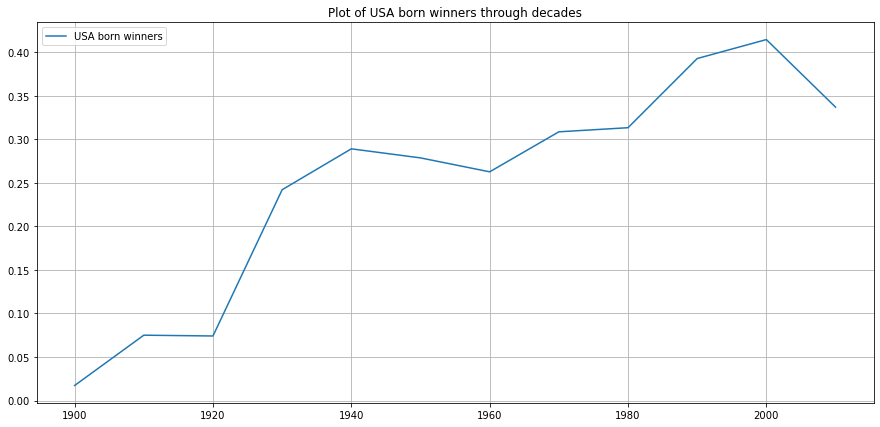

In [110]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(winnerPercentages, label='USA born winners')
ax.legend()
ax.grid(True)
ax.set_title('Plot of USA born winners through decades')

## Part 3: What is the gender of a typical Nobel Prize winner?

Add a `female_winner` column, where the value is `TRUE` when `Sex` is 'Female'

In [111]:
nobel['female_winner'] = nobel.Sex == 'Female'

Calculate the percentage of female winners by decade and category.

In [112]:
winnerCount = nobel.groupby('decade').female_winner.sum()
loserCount = nobel.decade.value_counts().sort_index()
winnerPercentages = winnerCount/loserCount
print('female born winner percentages', winnerPercentages)

female born winner percentages decade
1900    0.051724
1910    0.025000
1920    0.037037
1930    0.048387
1940    0.066667
1950    0.000000
1960    0.037500
1970    0.037383
1980    0.040404
1990    0.065421
2000    0.085714
2010    0.081633
dtype: float64


Plot the percentage of female winners by decade and category.

Text(0.5, 1.0, 'Plot of female born winners through decades')

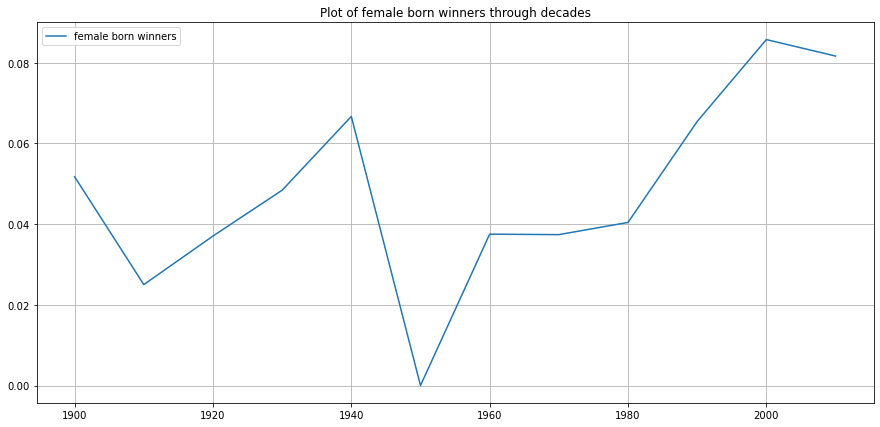

In [113]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(winnerPercentages, label='female born winners')
ax.legend()
ax.grid(True)
ax.set_title('Plot of female born winners through decades')

## Part 4: The first woman to win the Nobel Prize

Find the first woman to win a Nobel Prize.

In [114]:
nobel.loc[nobel.female_winner].head(1)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


## Part 5: Repeat laureates

Use the `count` method to count the number of wins grouped by `Full Name`.

In [115]:
nobel['Full Name'].value_counts()

Jack W. Szostak                                                                      3
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Paul Ehrlich                                                                         2
Roderick MacKinnon                                                                   2
Albert Fert                                                                          2
                                                                                    ..
Emilio Gino Segrè                                                                    1
Owen Chamberlain                                                                     1
Willard Frank Libby                                                                  1
Saint-John Perse                                                                     1
J. Michael Kosterlitz                                                                1
Name: Full Name, Length: 904, dtype: int64

## Part 6: How old are you when you get the prize?

Fix Albert John Lutuli and A. Michael Spence `Birth Date` values

In [127]:
pd.to_datetime(nobel['Birth Date'], errors='coerce', format='%Y-%M-%d')
#nobel['Birth Date'] = pd.to_datetime(nobel['Birth Date'], errors = 'coerce', format='%Y')
nobel['Year'] = pd.to_datetime(nobel['Year'], errors = 'coerce', format='%Y')

Calculate how old people were when they got their prize. Assign the resulting Series to the `nobel_age` column.

In [139]:
#nobel['Birth Date']
diff_in_days = nobel['Year'] - pd.to_datetime(nobel['Birth Date'], errors='coerce', format='%Y-%M-%d')
nobel['nobel_age'] = diff_in_days / np.timedelta64(1,'Y')


Plot `nobel_age` as a function of `Year` as a scatter plot.

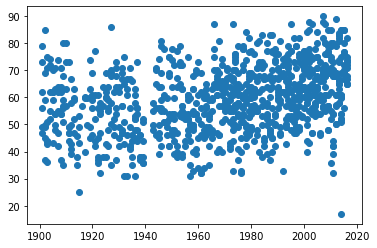

In [157]:
plt.scatter(nobel.Year, nobel.nobel_age)

## Part 6: Oldest and youngest winners

Find the oldest winner.

In [170]:
nobel.loc[nobel.nobel_age.idxmax()]

Year                                                  2007-01-01 00:00:00
Category                                                        Economics
Prize                   The Sveriges Riksbank Prize in Economic Scienc...
Motivation              "for having laid the foundations of mechanism ...
Prize Share                                                           1/3
Laureate ID                                                           820
Laureate Type                                                  Individual
Full Name                                                  Leonid Hurwicz
Birth Date                                                     1917-08-21
Birth City                                                         Moscow
Birth Country                                                      Russia
Sex                                                                  Male
Organization Name                                 University of Minnesota
Organization City                     

Find the youngest winner.

In [171]:
nobel.loc[nobel.nobel_age.idxmin()]

Year                                                  2014-01-01 00:00:00
Category                                                            Peace
Prize                                          The Nobel Peace Prize 2014
Motivation              "for their struggle against the suppression of...
Prize Share                                                           1/2
Laureate ID                                                           914
Laureate Type                                                  Individual
Full Name                                                Malala Yousafzai
Birth Date                                                     1997-07-12
Birth City                                                        Mingora
Birth Country                                                    Pakistan
Sex                                                                Female
Organization Name                                                     NaN
Organization City                     